In [1]:
import os
import lib
import clean
import librosa
import matplotlib.pyplot as plt

/home/razie/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
digits = [0,1,2,3,4,5,6,7,8,9]
files = os.listdir(lib.DIR)
coefs = []

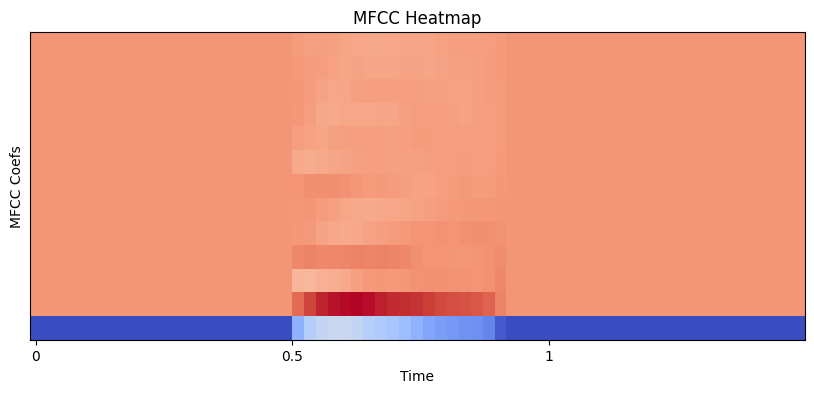

In [3]:
f = files[0]
y, sr = librosa.load(lib.DIR + f)
coefs  = librosa.feature.mfcc(y=y, sr=sr,n_mfcc=13)
plt.figure(figsize=(10, 4))
librosa.display.specshow(coefs, x_axis='time')
plt.title('MFCC Heatmap')
plt.ylabel('MFCC Coefs')
plt.show()

In [11]:
filePaths = []
lables = []
data = []

print("cleaning data...")
eliminations = clean.audio_cleaner(files)
files = clean.eliminateFiles(eliminations, files)


cleaning data...


In [12]:
for f in files:
    i = int(f[0])
    filePaths.append(lib.DIR + f)
    newdata = {"param": i, "name": lib.DIR+f}
    data.append(newdata)
    lables.append(digits[i])

training  0
training  1
training  2
training  3
training  4
training  5
training  6
training  7
training  8
training  9


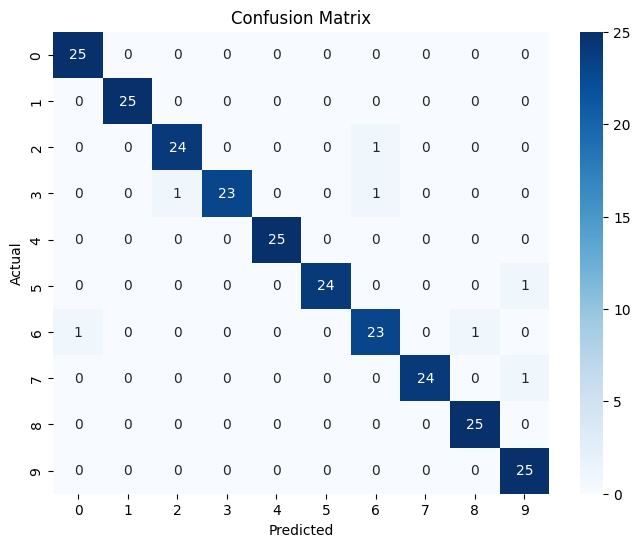

╒════╤═════════════╤══════════╤══════════╕
│    │   Precision │   Recall │       F1 │
╞════╪═════════════╪══════════╪══════════╡
│  0 │    0.961538 │     1    │ 0.980392 │
├────┼─────────────┼──────────┼──────────┤
│  1 │    1        │     1    │ 1        │
├────┼─────────────┼──────────┼──────────┤
│  2 │    0.96     │     0.96 │ 0.96     │
├────┼─────────────┼──────────┼──────────┤
│  3 │    1        │     0.92 │ 0.958333 │
├────┼─────────────┼──────────┼──────────┤
│  4 │    1        │     1    │ 1        │
├────┼─────────────┼──────────┼──────────┤
│  5 │    1        │     0.96 │ 0.979592 │
├────┼─────────────┼──────────┼──────────┤
│  6 │    0.92     │     0.92 │ 0.92     │
├────┼─────────────┼──────────┼──────────┤
│  7 │    1        │     0.96 │ 0.979592 │
├────┼─────────────┼──────────┼──────────┤
│  8 │    0.961538 │     1    │ 0.980392 │
├────┼─────────────┼──────────┼──────────┤
│  9 │    0.925926 │     1    │ 0.961538 │
╘════╧═════════════╧══════════╧══════════╛
total accur

In [13]:
a, b = lib.lib_hmm_trainor(data, digits)
lib.accuracy_evaluator(a, b, digits, "library hmm")

training  0
training  1
training  2
training  3
training  4
training  5
training  6
training  7
training  8
training  9


/home/razie/ai2/lib.py:165: RuntimeWarning: invalid value encountered in divide
  alpha[:, t] /= alpha_sum
/home/razie/ai2/lib.py:166: RuntimeWarning: divide by zero encountered in log
  log_likelihood += np.log(alpha_sum)


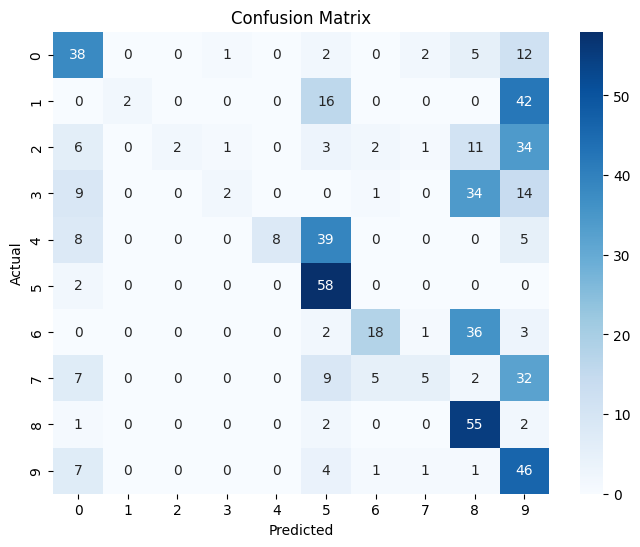

╒════╤═════════════╤═══════════╤═══════════╕
│    │   Precision │    Recall │        F1 │
╞════╪═════════════╪═══════════╪═══════════╡
│  0 │    0.487179 │ 0.633333  │ 0.550725  │
├────┼─────────────┼───────────┼───────────┤
│  1 │    1        │ 0.0333333 │ 0.0645161 │
├────┼─────────────┼───────────┼───────────┤
│  2 │    1        │ 0.0333333 │ 0.0645161 │
├────┼─────────────┼───────────┼───────────┤
│  3 │    0.5      │ 0.0333333 │ 0.0625    │
├────┼─────────────┼───────────┼───────────┤
│  4 │    1        │ 0.133333  │ 0.235294  │
├────┼─────────────┼───────────┼───────────┤
│  5 │    0.42963  │ 0.966667  │ 0.594872  │
├────┼─────────────┼───────────┼───────────┤
│  6 │    0.666667 │ 0.3       │ 0.413793  │
├────┼─────────────┼───────────┼───────────┤
│  7 │    0.5      │ 0.0833333 │ 0.142857  │
├────┼─────────────┼───────────┼───────────┤
│  8 │    0.381944 │ 0.916667  │ 0.539216  │
├────┼─────────────┼───────────┼───────────┤
│  9 │    0.242105 │ 0.766667  │ 0.368     │
╘════╧════

In [5]:
hmm_model_results,test_list = lib.custom_hmm_trainor(data, digits)
lib.accuracy_evaluator(hmm_model_results,test_list, digits,"writen hmm")

Preprocessing and Feature Extraction
1. Segmentaion: In our case segmenting the audio files would not be helpful since each file contains a single number and can be perfectly used as an element in the model but if segmentaion was applied, a file would be divided into parts none of of which was meaningful.

2. MFCC (Mel-Frequency Cepstral Coefficients): MFCCs are a widely used feature representation for audio signals. They are derived from the power spectrum of an audio signal after it has been passed through a series of processing steps including the Mel-scale transformation (which represents frequencies in a way that is more consistent with human perception) and the discrete cosine transform (DCT). MFCCs capture the spectral characteristics of an audio signal.

Zero Crossing Rate: The zero crossing rate is a feature that measures the rate at which the signal changes its sign. It is often used as a simple feature for distinguishing between voiced and unvoiced segments of speech or for identifying percussive events in music.

Mel-spectrogram: The Mel-spectrogram is a spectrogram where the frequencies are converted into Mel scale, which is a perceptually-based scale of pitches. Mel-spectrograms are used to represent the spectral content of an audio signal over time, with more emphasis on perceptually relevant frequencies.

Chroma Features: Chroma features capture the tonal content of an audio signal. They are derived from the spectral distribution of pitch classes (or chroma) and are invariant to changes in timbre and loudness. Chroma features are particularly useful in music information retrieval tasks such as chord recognition, genre classification, and melody extraction.

The relationship among these features lies in their complementary nature for representing different aspects of audio signals. MFCCs capture the spectral characteristics, zero crossing rate provides information about the temporal characteristics, Mel-spectrogram offers a combined time-frequency representation emphasizing perceptually relevant frequencies, and chroma features focus on the tonal content. In many audio processing tasks, a combination of these features is used to capture various aspects of the audio signal, allowing for more robust and comprehensive analysis.

3. 
Robustness:

Robust to Noise: MFCCs are often robust to noise to some extent, particularly if the noise is additive white Gaussian noise or stationary in nature. This is because MFCCs are derived from the log power spectrum, which inherently suppresses high-frequency noise components. However, in the presence of non-stationary or colored noise, the robustness may decrease.

Robust to Small Variations: MFCCs are generally robust to small variations in pronunciation, pitch, and timbre, making them suitable for tasks like speech recognition and speaker identification. This robustness is achieved by the combination of the Mel-scale frequency warping and the logarithmic compression of the spectrum, which reflect the perceptual characteristics of human hearing.

Robust to Scaling: MFCCs are somewhat robust to changes in the overall energy level of the signal since they are based on the logarithm of the power spectrum, which helps in normalizing the energy variations across different signals.

Sensitivity:

Sensitivity to Spectral Characteristics: MFCCs are sensitive to the spectral characteristics of the audio signal. Changes in the spectral shape, such as formant frequencies and bandwidths, can significantly affect the MFCCs.

Sensitivity to Temporal Structure: While MFCCs capture spectral features, they may not fully capture temporal dynamics such as rapid changes in pitch or sudden transitions in the signal. For tasks requiring precise temporal information, additional features or processing steps may be necessary.

Sensitivity to Parameter Choices: The sensitivity of MFCCs can also depend on the specific parameters chosen during their computation, such as the number of filterbanks, the frame size, and the frame overlap. Optimal parameter settings may vary depending on the characteristics of the audio signals and the application requirements.

4.    
Non-Stationary Noise: MFCCs are not robust to non-stationary noise or noise that varies rapidly over time. In environments with such noise, the effectiveness of MFCCs may be reduced, as they may not adequately capture the underlying signal amidst the noise fluctuations.

Transient Sounds: MFCCs may not capture transient sounds or sudden changes in the audio signal well. These could include percussive sounds, short-duration events, or rapidly changing acoustic features. In such cases, features that explicitly focus on capturing transient characteristics may be more appropriate.

Music Signals with Complex Harmonic Structures: While MFCCs are commonly used in music processing tasks, they may not capture the complex harmonic structures of certain musical instruments or styles effectively. Instruments with rich harmonic content, such as string instruments or certain electronic sounds, may require additional features or processing techniques for accurate representation.

Highly Non-Linear Signals: MFCCs assume a linear relationship between the Mel-scale frequencies and the actual frequencies in the audio signal. In cases where this assumption is violated, such as highly non-linear distortions or highly modulated signals, the effectiveness of MFCCs may be compromised.

Speaker or Genre Variability: While MFCCs are robust to some extent against variations in speaker characteristics, they may not capture subtle speaker-specific nuances or genre-specific characteristics well. In such cases, domain-specific feature engineering or more sophisticated modeling approaches may be necessary.

Low-Quality Recordings: In recordings with low quality or low signal-to-noise ratio, the effectiveness of MFCCs may be diminished. The features extracted from such recordings may not accurately represent the underlying signal due to the presence of artifacts or distortions.

5.
In the calculation of MFCCs (Mel-Frequency Cepstral Coefficients), frames are typically overlapped to improve the temporal resolution and reduce the effects of spectral leakage. The overlapping of frames is a common practice in many signal processing tasks, including speech and audio processing, and it offers several advantages:

Temporal Resolution: Overlapping frames allow for a higher temporal resolution in the analysis of the audio signal. By overlapping adjacent frames, information from successive time points is included in multiple frames, providing a smoother representation of temporal changes in the signal. This can be particularly important for capturing rapid changes in the signal, such as phonetic transitions in speech or transient events in music.

Reduced Spectral Leakage: Overlapping frames help mitigate the effects of spectral leakage, which occurs when the frequency content of a signal falls between the frequency bins of the analysis window. Spectral leakage can distort the spectral characteristics of the signal and introduce artifacts in the analysis. Overlapping frames reduce the impact of spectral leakage by ensuring that each segment of the signal is analyzed using multiple windows, thereby providing a more accurate representation of the signal's spectrum.

Improved Signal-to-Noise Ratio: Overlapping frames can improve the signal-to-noise ratio (SNR) by averaging out noise across overlapping segments. This can help enhance the robustness of feature extraction algorithms, such as MFCCs, by reducing the influence of noise on the extracted features.

Reduction of Border Effects: Overlapping frames can help mitigate border effects that occur at the beginning and end of the signal when using windowing functions. These effects arise due to the sudden truncation of the signal at the edges of the analysis window, leading to distortions in the spectral analysis. Overlapping frames ensure that the effects of windowing are spread out over adjacent frames, reducing the impact of border effects.

6.
The choice of using the first 12 or 13 coefficients in MFCCs (Mel-Frequency Cepstral Coefficients) is primarily based on both historical convention and empirical observations in the field of speech and audio processing. Here are some reasons why the first 12 or 13 coefficients are commonly used:

Dimensionality Reduction: While the full set of MFCC coefficients can capture detailed information about the spectral characteristics of the audio signal, using all coefficients may lead to high-dimensional feature vectors, which could increase computational complexity and memory requirements. By using only the first 12 or 13 coefficients, a reasonable compromise is achieved between preserving important spectral information and reducing dimensionality.

Dominance of Low-order Coefficients: In many applications, the first few MFCC coefficients tend to capture the majority of the spectral information relevant for the task at hand. These coefficients represent the overall shape of the spectral envelope, which is crucial for tasks such as speech recognition, speaker identification, and emotion recognition.

Perceptual Relevance: The first few MFCC coefficients are more perceptually relevant to human hearing. They correspond to features such as the overall energy, spectral shape, and the distribution of spectral energy across different frequency bands, which are important for human speech perception and auditory processing.

Robustness: The first 12 or 13 MFCC coefficients are often robust to variations in speech and environmental conditions, such as changes in background noise, speaker characteristics, and channel effects. This robustness makes them suitable for a wide range of speech and audio processing tasks.

Compatibility with Standards: Many speech and audio processing systems and algorithms, as well as standard feature sets used in research, conventionally use 12 or 13 MFCC coefficients. This facilitates compatibility, interoperability, and comparability across different systems and datasets.

Let's Get Familiar with HMM
1. States are hiddend states that our model be at each state. Each state has a chance of moving to another state or staying there at each step. These probability is known as transition chance. Observations are noisy inputs that help us find the next state of our model. Difference between Markov and Hidden Markov is in observations. In markov model at each time step(
) we know the state of we are in but in hidden markov we are trying to guess these states. In our model we have T observations which are frames of the audio. Each frame has 13 coefficients which are symbols of our model. In order to fit this for our model we need to find the distribution of these coefficients. Our states can be anything and we can have as much states as we want because goal of this problem is to find the probability of a sequence fitting our model not finding the state we will be in.

2. This is a first order hmm because each hidden state has one observation connected to it and hidden states are connected in form of a simple markov chain. This model is simple and only consider that current state only depends on the past. First order hmm has low compitational cost. It has the ability to model many types of situations and works well when our sequence have a short term depenency. More complex models can be utilized to handle situations where our relations are not really simple.

3. Hmm works well on sequential data and problems like pattern recognition(audio analysis, handwriting recognition,etc...). Commonly when we have different type of dependencies in our model hmm can be used.

4. Advantages:
Flexibility of hmm has made it popular for wide range of problems. Unlike neural networks,hmm has a high interpretability and we can easily understand it. Low computational cost is another advantage of this model.

Disadvatages:
Simplicity of this model makes it limited for complex data. It also requires sufficient amount of data for good results. Another problem is that different initial parameters may lead to different answers.

5. There can be other structures for example hierarchical hmm. This model is used when there exist a hierarchy in the sequence and each state captures some level of it. high level hmm is another structure which is capable for capturing complex features of data.

Evaluation and Inspection

1. Acuuracy measures the proportion of correct predictions in the model. This measure may not be enough because in multiclass classification, our prediction on some classes are really good but our model is predictiong one class horribly. As a result we need more accurate measurements.

Accuracy = TruePredictions / AllPredictions

precision for each class precision is the proportion of the true positive predictions out of all positive-predicted data.

Precision = TruePositive / (TruePos + FalsePos)

On the other hand recall is the proportion of true positive predictions out of actually positive data.

Recall = TruePositive / (TruePositive + FalseNegative)

Finally F1 score is a balanced evaluation of Recall and precision and shows performance of the model. F1 score has a value between 0 and 

F1 = 2 * (Recall * Precision) / (Recall + Precision)

2. Precision shows portion of positive preidicted data over all positive predicted samples. On the other side Recall shows portion of our positive predicted data over all trully positive data. For example if we have set of 10 data that 7 of them are positive and our model predict all of them positive, then our Precision is 0.7 but our Recall is 1 and with only Recall we would have thought that our model is doing perfect. On the other side if we have 10 samples that 7 of them are positive and our model predict one of these 7 positive and all other 9 negative then we wont have any False Positive prediction and our Precision is 1 but our Recall will be 0.14 So we need both of these metrics.

3. F1 score gives a harmonic importance to both Recall and Precision. This calculation is especially decent in imbalance datasets where the portion of negative and positive samples are not balanced. Furthuremore because of harmonic mean calculation F1 is less sensitive to exrtreme and noisy data.

4. These metrics give a evaluation for each class. To calculate total performance of our model we can use micro-average, macro-average and weighted-average.

TotalPrecisionMicro = Sigma(TP) / (Sigma(TP) + Sigma(FP))
TotalPrecisionMacro = Sigma(Precision) / N

macro average calculates precision or recall of each class and averages over them. in micro we average TP, NP, and FN. Then calculate the precision and recall. Micro averages along each instance while macro averages along each class. weighted average is like macro average but when we want to give some classes more or less importance.

6. Our second model does not do well on Hiphop genre but it might because of the low iterations. I tried different values for iteration and 12 or 13 iterations seemed to have the best result.

7. The library model may use different hmm structures or do some hyperparamether optimization for better results. It can also run more complex algorithms efficiently. The most important thing is how the library model map observations to
matrix.